# Tensorflow Test

## 变量共享
Tensorflow通过`tensorflow.variable_scope`和`tesorflow.get_variable`实现。

``` python
tf.get_variable(name,
    shape=None,
    dtype=None,
    initializer=None,
    regularizer=None,
    trainable=True,
    collections=None,
    caching_device=None,
    partitioner=None,
    validate_shape=True,
    use_resource=None,
    custom_getter=None,
    constraint=None
)
```
**共享条件: 变量的scope相同。**

In [1]:
import tensorflow as tf

with tf.variable_scope('v_scope', reuse=False) as scope1:
    W1 = tf.get_variable('w', shape=[3,4], initializer=tf.random_normal_initializer())
    
with tf.variable_scope('v_scope', reuse=True) as scope2:
    W2 = tf.get_variable('w')

print(W1)
print(W2)
print(W1 is W2)

<tf.Variable 'v_scope/w:0' shape=(3, 4) dtype=float32_ref>
<tf.Variable 'v_scope/w:0' shape=(3, 4) dtype=float32_ref>
True


## 激活函数Softplus
$Softplus(x)=log(1+e^{x})$

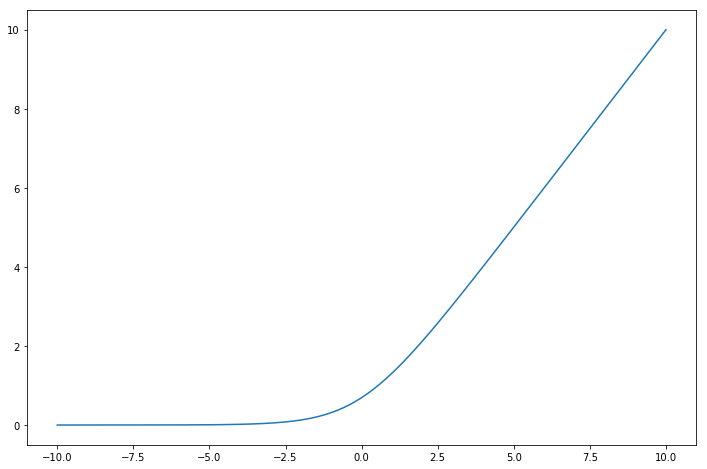

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 201)
y = np.log(1+np.power(np.e, x))

plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.show()

### [tf.reshape](https://www.tensorflow.org/api_docs/python/tf/reshape)
``` python
tf.reshape(
    tensor,
    shape,
    name=None
)
```

In [12]:
# tensor 't' is [1, 2, 3, 4, 5, 6, 7, 8, 9]
t = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# tensor 't' has shape [9]
print(tf.reshape(t, [3, 3]))
with tf.Session() as sess:
    a = tf.reshape(t, [3, 3])
    print(a.shape)
    print(a.eval())

Tensor("Reshape_5:0", shape=(3, 3), dtype=int32)
Tensor("Shape_20:0", shape=(2,), dtype=int32)
(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]


### [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims)
``` python
tf.expand_dims(
    input,
    axis=None,
    name=None,
    dim=None
)
```

In [16]:
import numpy as np
t = np.ones([2, 3, 5])
print(tf.shape(t))
with tf.Session() as sess:
    a = tf.expand_dims(t, 0)  # [1, 2, 3, 5]
    print(a.shape)
    #print(a.eval())
    b = tf.expand_dims(t, 2)  # [2, 3, 1, 5]
    print(b.shape)
    c = tf.expand_dims(t, 3)  # [2, 3, 5, 1]
    print(c.shape)
    

Tensor("Shape_30:0", shape=(3,), dtype=int32)
(1, 2, 3, 5)
(2, 3, 1, 5)
(2, 3, 5, 1)


### [tf.transpose](https://www.tensorflow.org/api_docs/python/tf/transpose)
